# Embedding to Identify Similar Words

### 1) Word2Vec Training

In [ ]:
# pip install pandas gensim matplotlib scikit-learn

In [1]:
import pandas as pd

# Create a DataFrame of sentences
data = {
    "sentences": [
        "I love programming in Python",
        "Python and Java are popular programming languages",
        "I enjoy solving coding problems",
        "Machine learning is fascinating",
        "Deep learning models are powerful",
        "Coding in Python is fun",
        "Artificial intelligence and programming go hand in hand",
    ]
}

df = pd.DataFrame(data)
print(df)

                                           sentences
0                       I love programming in Python
1  Python and Java are popular programming languages
2                    I enjoy solving coding problems
3                    Machine learning is fascinating
4                  Deep learning models are powerful
5                            Coding in Python is fun
6  Artificial intelligence and programming go han...


In [2]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenize sentences
df["tokenized"] = df["sentences"].apply(word_tokenize)

# Train a Word2Vec model
model = Word2Vec(sentences=df["tokenized"], vector_size=50, window=5, min_count=1, workers=1, sg=1)

# Save the trained model for future use (optional)
model.save("word2vec_example.model")


[nltk_data] Downloading package punkt to /Users/Alberto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2) Visualization of embeddings with Matplotlib and Tensorboard

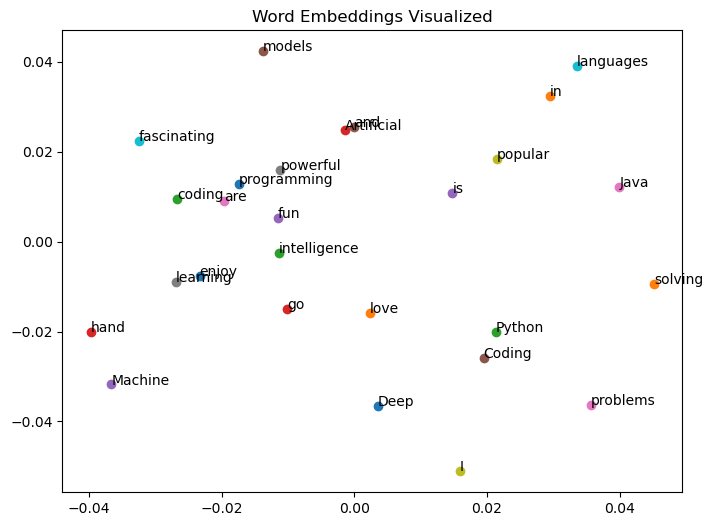

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get word vectors
words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]

# Reduce dimensions to 2D
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot word embeddings
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
plt.title("Word Embeddings Visualized")
plt.show()


### 3) Implementation of Euclidean or cosine distance

In [4]:
from scipy.spatial.distance import cosine

# Find similar words
def find_similar_words(word, top_n=3):
    similar_words = model.wv.most_similar(word, topn=top_n)
    return similar_words

# Example: Find similar words to "Python"
similar = find_similar_words("Python")
print("Words similar to 'Python':", similar)


Words similar to 'Python': [('popular', 0.19608168303966522), ('is', 0.1656358391046524), ('love', 0.1551763415336609)]


### 4) Semantic search

In [5]:
import numpy as np

# Get sentence embeddings by averaging word embeddings
def get_sentence_embedding(sentence):
    words = word_tokenize(sentence)
    word_embeddings = [model.wv[word] for word in words if word in model.wv]
    if word_embeddings:
        return np.mean(word_embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)

# Search for the most similar sentences
def semantic_search(query, df, top_n=3):
    query_embedding = get_sentence_embedding(query)
    df["similarity"] = df["sentences"].apply(
        lambda x: 1 - cosine(query_embedding, get_sentence_embedding(x))
    )
    return df.sort_values(by="similarity", ascending=False).head(top_n)

# Example: Search similar sentences to "I like Python programming"
query = "I like Python programming"
results = semantic_search(query, df)
print("Query:", query)
print("Most similar sentences:")
print(results[["sentences", "similarity"]])


Query: I like Python programming
Most similar sentences:
                                           sentences  similarity
0                       I love programming in Python    0.833295
5                            Coding in Python is fun    0.444840
1  Python and Java are popular programming languages    0.401361
